In [31]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import heapq
%matplotlib inline

In [2]:
Y_data = np.loadtxt('data/data.txt').astype(int)
ratings = Y_data[:, 2]
movies = Y_data[:, 1]
users = Y_data[:, 0]

Text(0.5,1,u'Histogram of All Movie Ratings')

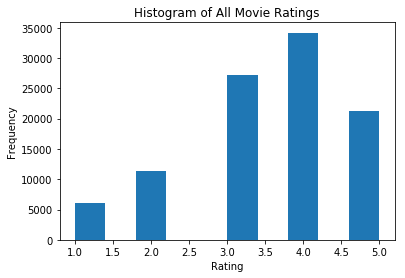

In [28]:
plt.figure(0)
plt.hist(ratings)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of All Movie Ratings')

In [4]:
movie_counts = np.bincount(movies)
top_10_counts = heapq.nlargest(10, movie_counts)
top_10_movies = []

for i in range(len(top_10_counts)):
    movie_id = int(np.where(movie_counts == top_10_counts[i])[0])
    top_10_movies.append(movie_id)

top_10_movies = np.asarray(top_10_movies)
print top_10_movies

[ 50 258 100 181 294 286 288   1 300 121]


In [16]:
def get_ratings(movies, ratings, movie_id):
    r = []
    for i in range(len(movies)):
        if (movies[i] == movie_id):
            r.append(ratings[i])
    return r

In [18]:
movie_dic = {}
for i in range(1682):
    movie_dic[i+1] = get_ratings(movies, ratings, i+1)

In [20]:
top_10_ratings = []
for i in range(len(top_10_movies)):
    top_10_ratings += movie_dic[top_10_movies[i]]
top_10_ratings = np.asarray(top_10_ratings)
print top_10_ratings

[5 4 5 ..., 4 4 5]


Text(0.5,1,u'Histogram of 10 Most Popular Movie Ratings')

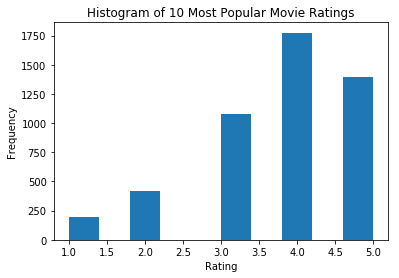

In [27]:
plt.figure(1)
plt.hist(top_10_ratings)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of 10 Most Popular Movie Ratings')

In [22]:
average_ratings = np.zeros(1682)
qualified_number = 20
for i in range(len(average_ratings)):
    movie_i_ratings = movie_dic[i + 1]
    if (len(movie_i_ratings) >= qualified_number):
        average_ratings[i] = np.average(movie_i_ratings)

In [23]:
best_10_ratings = heapq.nlargest(10, average_ratings)
best_10_movies = []
for i in range(len(best_10_ratings)):
    movie_id = int(np.where(average_ratings == best_10_ratings[i])[0]) + 1
    best_10_movies.append(movie_id)
best_10_movies = np.asarray(best_10_movies)
print best_10_movies

[408 318 169 483 114  64 603  12  50 178]


In [24]:
best_10_all_ratings = []
for i in range(len(best_10_movies)):
    best_10_all_ratings += movie_dic[best_10_movies[i]]
best_10_all_ratings = np.asarray(best_10_all_ratings)
print best_10_all_ratings

[5 5 1 ..., 4 5 5]


Text(0.5,1,u'Histogram of 10 Highest Rated Movie Ratings (minimum 20 ratings to be considered)')

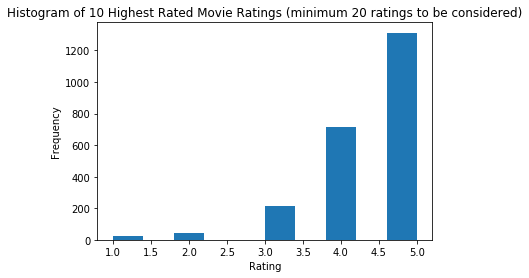

In [29]:
plt.figure(2)
plt.hist(best_10_all_ratings)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of 10 Highest Rated Movie Ratings (minimum ' + str(qualified_number) + ' ratings to be considered)')